In [4]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6"  color="red">ch11. 데이터프레임과 시리즈(Pandas)_9~13절 </font></b>
# 9절 데이터그룹화 및 집계

In [34]:
from statsmodels.api  import datasets
iris = datasets.get_rdataset('iris').data
print(iris.shape)
iris.iloc[[0,49,50,99,100,149]]

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
99,5.7,2.8,4.1,1.3,versicolor
100,6.3,3.3,6.0,2.5,virginica
149,5.9,3.0,5.1,1.8,virginica


## 9.1 groupby
cf. pivot_table

## 1) 그룹화 방법 1 groupby

In [35]:
# 1)그룹화 방법 1
#     df.groupby(by=[그룹핑할 열])[[함수적용해서 출력할 열들]].기초통계함수()
    # [[함수적용해서 출력할 열들]] 생략시 모든 열에 적용됨
iris_groupby = iris.groupby(by='Species')
iris_groupby = iris.groupby(by=iris.Species)
list(iris_groupby)

[('setosa',
      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
  0            5.1          3.5           1.4          0.2  setosa
  1            4.9          3.0           1.4          0.2  setosa
  2            4.7          3.2           1.3          0.2  setosa
  3            4.6          3.1           1.5          0.2  setosa
  4            5.0          3.6           1.4          0.2  setosa
  5            5.4          3.9           1.7          0.4  setosa
  6            4.6          3.4           1.4          0.3  setosa
  7            5.0          3.4           1.5          0.2  setosa
  8            4.4          2.9           1.4          0.2  setosa
  9            4.9          3.1           1.5          0.1  setosa
  10           5.4          3.7           1.5          0.2  setosa
  11           4.8          3.4           1.6          0.2  setosa
  12           4.8          3.0           1.4          0.1  setosa
  13           4.3          3.0           1.1     

In [36]:
iris_grouped_sum =iris_groupby.sum()
iris_grouped_sum  # iris.groupby(by='Species').sum()
# iris.groupby(by='Species')[['Sepal.Length','Sepal.Width']].sum()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [37]:
# setosa 와 virginica의 종별 합
iris_grouped_sum.loc[['setosa','virginica']]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
virginica,329.4,148.7,277.6,101.3


In [38]:
# 인덱스Species를 컬럼으로
iris_grouped_sum.reset_index(inplace=True)
iris_grouped_sum

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [39]:
# setosa 와 virginica의 종별 합
iris_grouped_sum[(iris_grouped_sum['Species']=='setosa') | 
                 (iris_grouped_sum['Species']=='virginica')]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [40]:
iris_grouped_sum[iris_grouped_sum['Species'].isin(['setosa','virginica'])]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


### ★그룹화 방법 1-1

In [41]:
# 1)그룹화 방법 1-1 :그룹핑할 때 index를 컬럼으로 편입
#     df.groupby(by=[그룹핑할 열],as_index=False)[[함수적용해서 출력할 열들]].기초통계함수()
      # [[함수적용해서 출력할 열들]] 생략시 모든 열에 적용됨
iris.groupby('Species', as_index=False).sum()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


## 2) 그룹화 방법 2 pivot_table

In [42]:
# 2) 그룹화방법2
#      df.pivot_table(index='그룹화할 열',
        #              values=[함수적용해서 출력할 열들],
        #               aggfunc='기초통계함수')

In [47]:
iris.pivot_table(index='Species',
                # values=['Sepal.length'],
                aggfunc='count')

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


## ※다중열 그룹화

In [52]:
# iris를 다중열로 그룹화하기 위해 데이터 추가(num필드)
# 0-25개, 1-25개,3-25개,4-25개,5-25개,
import numpy as np
np.array([[i]*25 for i in range(6)]).ravel()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [55]:
iris['num'] = np.array([[i]*25 for i in range(6)]).ravel()
iris.iloc[::10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


In [56]:
# Species별, num별 합계
r = iris.groupby(by=['Species','num']).sum()
r

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0           125.7         87.0          36.5          6.2
           1           124.6         84.4          36.6          6.1
versicolor 2           150.3         69.4         107.8         33.6
           3           146.5         69.1         105.2         32.7
virginica  4           164.4         73.2         141.0         51.1
           5           165.0         75.5         136.6         50.2

In [57]:
r.loc[['setosa','virginica']]

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   num                                                      
setosa    0           125.7         87.0          36.5          6.2
          1           124.6         84.4          36.6          6.1
virginica 4           164.4         73.2         141.0         51.1
          5           165.0         75.5         136.6         50.2

In [58]:
r.loc[[('setosa',0),('virginica',4)]]

,,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,num,,,,
setosa,0,125.7,87.0,36.5,6.2
virginica,4,164.4,73.2,141.0,51.1


In [60]:
# Species별, num별 합계(그룹핑할 열을 컬럼 데이터로)  => 다중 인덱스가 아님..
iris.groupby(by=['Species','num'],as_index=False).sum()

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,125.7,87.0,36.5,6.2
1,setosa,1,124.6,84.4,36.6,6.1
2,versicolor,2,150.3,69.4,107.8,33.6
3,versicolor,3,146.5,69.1,105.2,32.7
4,virginica,4,164.4,73.2,141.0,51.1
5,virginica,5,165.0,75.5,136.6,50.2


In [61]:
iris.groupby(by=['Species','num'],
             as_index=False)[['Sepal.Length','Sepal.Width']].sum()

,Species,num,Sepal.Length,Sepal.Width
0,setosa,0,125.7,87.0
1,setosa,1,124.6,84.4
2,versicolor,2,150.3,69.4
3,versicolor,3,146.5,69.1
4,virginica,4,164.4,73.2
5,virginica,5,165.0,75.5


In [63]:
iris.pivot_table(index=['Species','num'],
                 values['Sepal.Length','Sepal.Width'],
                 aggfunc='sum')

SyntaxError: positional argument follows keyword argument (2921467541.py, line 3)

In [65]:
#iris.groupby('Species').describe()
iris.groupby('Species')[['Sepal.Length',
                        'Sepal.Width',
                         'Petal.Length',
                         'Petal.Width']].describe()

Sepal.Length                                              \
                  count   mean       std  min    25%  50%  75%  max   
Species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           Sepal.Width         ... Petal.Length      Petal.Width         \
                 count   mean  ...          75%  max       count   mean   
Species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [66]:
iris.groupby('Species')[['Sepal.Length',
                        'Sepal.Width',
                         'Petal.Length',
                         'Petal.Width']].describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

In [68]:
g = iris.groupby('Species')[['Sepal.Length',
                        'Sepal.Width',
                         'Petal.Length',
                         'Petal.Width']].sum()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


<Axes: xlabel='Species'>

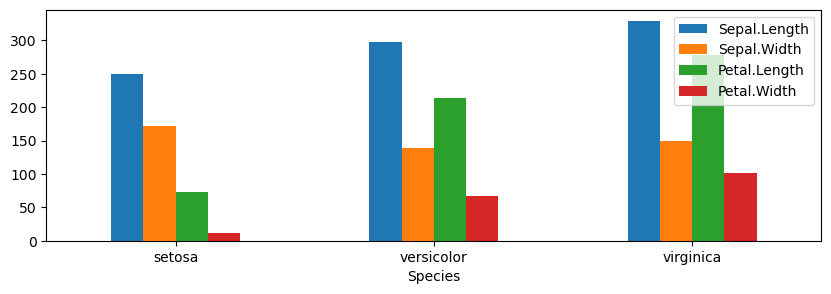

In [73]:
import matplotlib.pyplot as plt
g.plot(kind='bar',figsize=(10,3),rot=0) 
# 범례를 밖으로

### * 범례를 밖으로
https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot :범례사용 (시각화 20페이지)

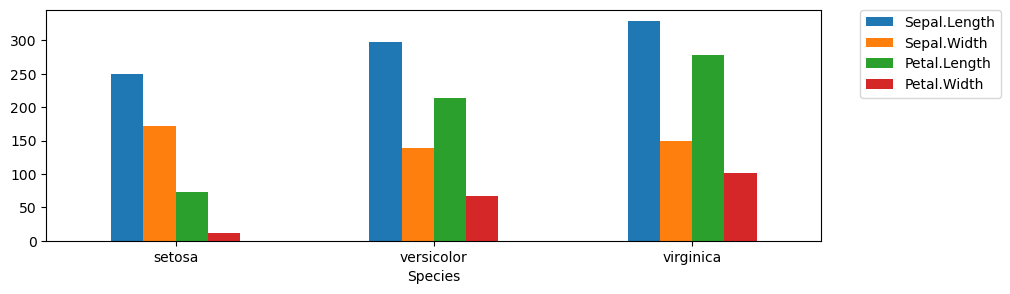

In [76]:
# 범례를 밖으로
import matplotlib.pyplot as plt
g.plot(kind='bar',figsize=(10,3),rot=0) 
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## 9.2 그룹간 데이터 처리

In [78]:
iris_grouped = iris.groupby('Species')
iris_grouped
list(iris_grouped)

[('setosa',
      Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species  num
  0            5.1          3.5           1.4          0.2  setosa    0
  1            4.9          3.0           1.4          0.2  setosa    0
  2            4.7          3.2           1.3          0.2  setosa    0
  3            4.6          3.1           1.5          0.2  setosa    0
  4            5.0          3.6           1.4          0.2  setosa    0
  5            5.4          3.9           1.7          0.4  setosa    0
  6            4.6          3.4           1.4          0.3  setosa    0
  7            5.0          3.4           1.5          0.2  setosa    0
  8            4.4          2.9           1.4          0.2  setosa    0
  9            4.9          3.1           1.5          0.1  setosa    0
  10           5.4          3.7           1.5          0.2  setosa    0
  11           4.8          3.4           1.6          0.2  setosa    0
  12           4.8          3.0           1.4       

In [79]:
# 종별 상위 3개씩 출력
for speciesname,group in iris_grouped:
    print(speciesname)
    display(group.head(3))   # display(group.sample(3))

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
101,5.8,2.7,5.1,1.9,virginica,4
102,7.1,3.0,5.9,2.1,virginica,4


In [81]:
# 종별 임의로 3개씩 출력
for speciesname,group in iris_grouped:
    print(speciesname)
    display(group.sample(3).sort_index())   

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
36,5.5,3.5,1.3,0.2,setosa,1
46,5.1,3.8,1.6,0.2,setosa,1
49,5.0,3.3,1.4,0.2,setosa,1


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
86,6.7,3.1,4.7,1.5,versicolor,3
94,5.6,2.7,4.2,1.3,versicolor,3


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
114,5.8,2.8,5.1,2.4,virginica,4
137,6.4,3.1,5.5,1.8,virginica,5
148,6.2,3.4,5.4,2.3,virginica,5


In [83]:
# 종별  0,10,20,30,40번째 출력
for speciesname, group in iris_grouped:
    print(speciesname)
    display(group.iloc[[0,10,20,30,40]]) 

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1


versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
110,6.5,3.2,5.1,2.0,virginica,4
120,6.9,3.2,5.7,2.3,virginica,4
130,7.4,2.8,6.1,1.9,virginica,5
140,6.7,3.1,5.6,2.4,virginica,5


## 9.3 데이터프레임 그룹 인덱싱
- 종별 0,10,20,30,40번째 추출

In [84]:
iris.groupby('Species').take([0,10,20,30,40])

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  num
Species                                                                  
setosa     0             5.1          3.5           1.4          0.2    0
           10            5.4          3.7           1.5          0.2    0
           20            5.4          3.4           1.7          0.2    0
           30            4.8          3.1           1.6          0.2    1
           40            5.0          3.5           1.3          0.3    1
versicolor 50            7.0          3.2           4.7          1.4    2
           60            5.0          2.0           3.5          1.0    2
           70            5.9          3.2           4.8          1.8    2
           80            5.5          2.4           3.8          1.1    3
           90            5.5          2.6           4.4          1.2    3
virginica  100           6.3          3.3           6.0          2.5    4
           110           6.5          3.2           5.1          2.0    4
           120           6.9          3.2           5.7          2.3    4
           130           7.4          2.8           6.1          1.9    5
           140           6.7          3.1           5.6          2.4    5

# 10절 데이터구조 변경
- 와이드포맷 <-> 롱포맷
- 판다스 공식 문서의 melt :https://pandas.pydata.org/docs/user_guide/reshaping.html#melt-and-wide-to-long
- Tidy Data : https://vita.had.co.nz/papers/tidy-data.pdf

In [87]:
from statsmodels.api import datasets
airquality = datasets.get_rdataset('airquality').data
airquality.head(3)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3


## 10.1 melt를 이용한 언피벗팅(와이드포맷 -> 롱포맷)

In [93]:
 airquality.melt(id_vars=['Month','Day'])   #.sort_values(by=['Month','Day'])

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [99]:
# 
airquality_melted = airquality.melt(id_vars=['Month','Day'],
                var_name='변수명',
                value_name='값').sort_values(by=['Month','Day']) 
airquality_melted.reset_index(drop=True,inplace=True)
airquality_melted

,Month,Day,변수명,값
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0
...,...,...,...,...
607,9,29,Temp,76.0
608,9,30,Ozone,20.0
609,9,30,Solar.R,223.0
610,9,30,Wind,11.5


## 10.2  pivot_table을 이용한 피벗팅(롱포맷 -> 와이드포맷)

In [104]:
airquality2 = airquality_melted.pivot_table(index=['Month','Day'],
                              columns='변수명',
                              values='값')
airquality2.head()

변수명        Ozone  Solar.R  Temp  Wind
Month Day                            
5     1     41.0    190.0  67.0   7.4
      2     36.0    118.0  72.0   8.0
      3     12.0    149.0  74.0  12.6
      4     18.0    313.0  62.0  11.5
      5      NaN      NaN  56.0  14.3

In [106]:
airquality2.reset_index() # .reset_index(inplace=True)

변수명,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


In [108]:
airquality2.reset_index(inplace=True)
airquality2.columns.name =None
airquality2

,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
...,...,...,...,...,...,...
148,9,26,30.0,193.0,70.0,6.9
149,9,27,NaN,145.0,77.0,13.2
150,9,28,14.0,191.0,75.0,14.3
151,9,29,18.0,131.0,76.0,8.0


# 11절 데이터프레임에 함수 적용시키기
- apply(func,axis) : 데이터프레임이나 시리즈(axis불필요) 모두 적용가능
- applymap(func) : 각 요소별로 적용(데이터프레임에서만 가능)
- map(func) : 각 요소별로 적용(1차원 시리즈에서만 가능)

## 11.1  apply / map

### ex1. 1차원 시리즈에 apply 사용

In [110]:
# ex1. 1차원 시리즈에 apply 사용
import pandas  as pd
member = pd.read_csv('data/ch11_member.csv',comment='#')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [114]:
# 1999-01-30 문자를 1999 숫자로 return
def parse_year(datestr):
    return int(datestr.split("-")[0])
parse_year("1999-01-30")

1999

In [118]:
# 1999-01-30 문자를 1 숫자로 return
def parse_month(datestr):
    return int(datestr.split("-")[1])
parse_month = lambda datestr : int(datestr.split("-")[1])
parse_month("1999-01-30")

1

In [121]:
member['Birth'].apply(lambda datestr:int(datestr.split("-")[0]))

0    1999
1    1999
2    1999
3    1999
4    1999
Name: Birth, dtype: int64

### ★ 년월일 쪼개기

In [123]:
member['년'] = member['Birth'].apply(lambda datestr:int(datestr.split("-")[0]))
member['월'] = member['Birth'].apply(lambda datestr:int(datestr.split("-")[1]))
member['일'] = member['Birth'].apply(lambda datestr:int(datestr.split("-")[2]))
member

,Name,Age,Email,Address,Birth,년,월,일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1999,1,1
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,1999,12,1
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,1999,11,1
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,1999,5,1
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1999,1,30


In [124]:
# scalar일때는 apply대신 map동일
member['년'] = member['Birth'].map(lambda datestr:int(datestr.split("-")[0]))
member['월'] = member['Birth'].map(lambda datestr:int(datestr.split("-")[1]))
member['일'] = member['Birth'].map(lambda datestr:int(datestr.split("-")[2]))
member

,Name,Age,Email,Address,Birth,년,월,일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1999,1,1
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,1999,12,1
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,1999,11,1
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,1999,5,1
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,1999,1,30


### ex2. 2차원 시리즈에 apply 사용(func, axis)

In [125]:
# ex2. 2차원 시리즈에 apply 사용(func, axis)
%ls "C:\ai\downloads\shareData\부동산"

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: A014-DCD6

 C:\ai\downloads\shareData\부동산 디렉터리

2025-10-13  오전 09:33    <DIR>          .
2025-10-13  오전 09:33    <DIR>          ..
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2025-10-12  오후 05:04           412,552 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv
               2개 파일             414,715 바이트
               2개 디렉터리  153,334,755,328 바이트 남음


In [128]:
df_last = pd.read_csv(r"C:\ai\downloads\shareData\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv",
                     encoding='cp949')
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [134]:
row = df_last.loc[0]  # type(df_last.loc[0])
row

지역명             서울
규모구분          모든면적
연도            2015
월               10
분양가격(제곱미터)    5841
Name: 0, dtype: object

In [136]:
row.지역명, row['지역명']

('서울', '서울')

In [141]:
# 함수 만들기
def year_month(series):
    return str(series['연도'])+'년'+str(series['월'])+'월'
year_month(df_last.iloc[100])

'2015년11월'

In [146]:
df_last['연도월'] = df_last.apply(lambda series:str(series['연도'])+'년'+str(series['월'])+'월', axis=1)

In [147]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),연도월
0,서울,모든면적,2015,10,5841,2015년10월
1,서울,전용면적 60제곱미터이하,2015,10,5652,2015년10월
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882,2015년10월
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721,2015년10월
4,서울,전용면적 102제곱미터초과,2015,10,5879,2015년10월


## 11.2 applymap

In [150]:
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:,:-1]
X.sample()

,sepal_length,sepal_width,petal_length,petal_width
44,5.1,3.8,1.9,0.4


In [152]:
X.applymap(lambda x:x**2).head()

,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04


In [153]:
X.applymap(np.round) # np.round 반올림

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


# ※(연습예제:)melt() 및 함수적용하기 (와이드포맷 -> 롱포맷, pd.concat)
```
    - 와이드포맷 -> 롱포맷
    - 2013년12월 -> 2013과 12 나눠 '연도'와 '월' 컬럼(apply,map)
    - 평당분양가격/3.3, 컬럼명 조정  => new_first
    - df_last['규모규격']=='모든면적' 추출 => new_last
    - pd.concat([new_first,new_last])
```

In [157]:
# 2013년 ~ 2015년 8월(와이드포맷)
df_first = pd.read_csv("C:/ai/downloads/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv",
                     encoding='cp949')
print(df_first.shape)
df_first.head()

(17, 22)


,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [160]:
#     - 와이드포맷 -> 롱포맷

df_first_melted = df_first.melt(id_vars=['지역'],
               var_name='연도월',
               value_name='분양가격')
df_first_melted.reset_index(drop=True, inplace=True)
df_first_melted.head()


,지역,연도월,분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [183]:
#     - 2013년12월 -> 2013과 12 나눠 '연도'와 '월' 컬럼(apply,map)
#     - 평당분양가격/3.3, 컬럼명 조정  => new_first
#     - df_last['규모규격']=='모든면적' 추출 => new_last
#     - pd.concat([new_first,new_last])
df_first_melted['년'] = df_first_melted['연도월'].apply(lambda datestr : int(datestr.split('년')[0]))
df_first_melted['월'] = df_first_melted['연도월'].apply(lambda datestr : (datestr.split('년')[1].replace('월', '', regex=False)
.astype(int)))
df_first_melted

TypeError: str.replace() takes no keyword arguments

In [155]:

# 2015년 10월 ~ 2024년(롱포맷)
df_last = pd.read_csv(r"C:\ai\downloads\shareData\부동산\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv",
                     encoding='cp949')
df_last

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
9090,제주,모든면적,2024,8,7703
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,7515
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN
